<a href="https://www.kaggle.com/code/jesuisetudiant/kpop-data-analysis-and-music-group-classification?scriptVersionId=132469275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/all-kpop-idols/kpopidolsv3.csv


# **Data Reading**

In [2]:
# Read the dataset in dataframe
data = pd.read_csv('/kaggle/input/all-kpop-idols/kpopidolsv3.csv')
data.head()

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,NaN,172.0,55.0,NaN,NaN,NaN,M
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,9/07/2019,ONO,South Korea,NaN,181.0,62.0,NaN,NaN,NaN,M
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,31/10/2015,A team,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,NaN,163.0,NaN,Daegu,NaN,NaN,F
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,NaN,160.0,44.0,Wonju,NaN,NaN,F


# **Data Preprocessing**

In [3]:
# View the shape of the data
data.shape

(1778, 16)

In [4]:
# Check for Missing values in the dataset
data.isna().sum()

Stage Name           0
Full Name            9
Korean Name         10
K Stage Name         1
Date of Birth        2
Group              146
Debut              146
Company            146
Country              0
Second Country    1716
Height             942
Weight            1212
Birthplace         944
Other Group       1638
Former Group      1514
Gender               0
dtype: int64

In [5]:
# Check data columns names
data.columns

Index(['Stage Name', 'Full Name', 'Korean Name', 'K Stage Name',
       'Date of Birth', 'Group', 'Debut', 'Company', 'Country',
       'Second Country', 'Height', 'Weight', 'Birthplace', 'Other Group',
       'Former Group', 'Gender'],
      dtype='object')

In [6]:
# removing some columns from the data as we don't need them
data = data.drop(['Second Country', 'Former Group', 'Other Group'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stage Name     1778 non-null   object 
 1   Full Name      1769 non-null   object 
 2   Korean Name    1768 non-null   object 
 3   K Stage Name   1777 non-null   object 
 4   Date of Birth  1776 non-null   object 
 5   Group          1632 non-null   object 
 6   Debut          1632 non-null   object 
 7   Company        1632 non-null   object 
 8   Country        1778 non-null   object 
 9   Height         836 non-null    float64
 10  Weight         566 non-null    float64
 11  Birthplace     834 non-null    object 
 12  Gender         1778 non-null   object 
dtypes: float64(2), object(11)
memory usage: 180.7+ KB


## **Handling Missing Values**

In [8]:
# Imputing values in Group Column

# findding mode value in group column as it is a categorical column
group_mode = data['Group'].mode().values[0]
data['Group'].fillna(group_mode, inplace=True)

In [9]:
# Imputing values in Debut column
Debut_mode = data['Debut'].mode().values[0]
data['Debut'].fillna(Debut_mode, inplace=True)

In [10]:
# Impute values in Company Column
company_mode  = data['Company'].mode().values[0]
data['Company'].fillna(company_mode, inplace=True)

In [11]:
# impute values in DOB column, there are are multiples mode values we are replacing with value located at 3 index
dob_mode = data['Date of Birth'].mode()[3]
data['Date of Birth'].fillna(dob_mode, inplace=True)

In [12]:
KStageMissing = data[data['K Stage Name'].isnull()]
KStageMissing

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender
930,Lee Hoo,Moon Junyoung,문준영,NaN,9/02/1989,ZE:A,7/01/2010,Star Empire,South Korea,NaN,NaN,Seoul,M


In [13]:
# There was only 1 value missing in this column so by hard coded it by going through Stage Name
data['K Stage Name'].fillna('이후', inplace=True)

In [14]:
# Impute values in Height
height_mean = data['Height'].mean().round(0)
data['Height'].fillna(height_mean, inplace=True)

In [15]:
# Impute values in Weight column
weight_mean = data['Weight'].mean().round(0)
data['Weight'].fillna(weight_mean, inplace=True)

In [16]:
# Lets Impute values in Birthplace Column
birthplace_mode = data['Birthplace'].mode().values[0]
data['Birthplace'].fillna(birthplace_mode, inplace=True)

In [17]:
FNameMissing = data[data['Full Name'].isnull()]
FNameMissing

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender
301,Euna,NaN,NaN,은아,25/05/2003,We;Na,5/09/2022,Shine E&M,South Korea,164.0,57.0,Seoul,F
432,Hari,NaN,NaN,하리,8/04/2005,Girls' World,20/06/2002,Liz,Japan,171.0,57.0,Kagoshima,F
434,Harin,NaN,NaN,하린,21/11/1995,Lusty,26/06/2019,babaplay,South Korea,160.0,43.0,Seoul,F
604,Isol,NaN,NaN,이솔,1/05/1997,Lusty,26/06/2019,babaplay,South Korea,166.0,48.0,Seoul,F
712,Jinhui,NaN,NaN,진희,21/11/1996,Lusty,26/06/2019,babaplay,South Korea,160.0,42.0,Seongnam,F
1026,Mini,NaN,NaN,민이,12/06/2000,Purplebeck,24/06/2019,Majesty,South Korea,168.0,47.0,Seoul,F
1172,Roa,NaN,NaN,로아,16/01/2004,X:IN,11/04/2023,Escrow,South Korea,171.0,57.0,Seoul,F
1639,Yeryung,NaN,NaN,예령,22/06/2002,Lusty,26/06/2019,babaplay,South Korea,169.0,49.0,Busan,F
1685,Yoonji,NaN,NaN,윤지,21/07/1998,Lusty,26/06/2019,babaplay,South Korea,163.0,45.0,Seoul,F


In [18]:
# These values are replaced by searching the value on the Kpop- Wiki wesite
data.loc[data['Stage Name'] == 'Euna', 'Full Name'] = 'Euna Kim'
data.loc[data['Stage Name'] == 'Euna', 'Korean Name'] = '유나킴'
data.loc[data['Stage Name'] == 'Hari', 'Full Name'] = 'Jeong Sung-kyung'
data.loc[data['Stage Name'] == 'Hari', 'Korean Name'] = '정성경'
data.loc[data['Stage Name'] == 'Harin', 'Full Name'] = 'Lee Ha Rin'
data.loc[data['Stage Name'] == 'Harin', 'Korean Name'] = '이하린'
data.loc[data['Stage Name'] == 'Isol', 'Full Name'] = 'Jeong Yeon-su'
data.loc[data['Stage Name'] == 'Isol', 'Korean Name'] = '정연수'
data.loc[data['Stage Name'] == 'Jinhui', 'Full Name'] = 'Yang Jin-hee'
data.loc[data['Stage Name'] == 'Jinhui', 'Korean Name'] = '양진희'
data.loc[data['Stage Name'] == 'Mini', 'Full Name'] = 'Park Min-yi'
data.loc[data['Stage Name'] == 'Mini', 'Korean Name'] = '박민이'
data.loc[data['Stage Name'] == 'Roa', 'Full Name'] = 'Ahn Ji In'
data.loc[data['Stage Name'] == 'Roa', 'Korean Name'] = '안지인'
data.loc[data['Stage Name'] == 'Yeryung', 'Full Name'] = 'Go Seo-jeong'
data.loc[data['Stage Name'] == 'Yeryung', 'Korean Name'] = '고서정'
data.loc[data['Stage Name'] == 'Yoonji', 'Full Name'] = 'Biàn Yǔnzhì'
data.loc[data['Stage Name'] == 'Yoonji', 'Korean Name'] = '卞允智'

In [19]:
# Lets check more missing values in Korean Names
FNameMissing = data[data['Korean Name'].isnull()]
FNameMissing

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender
991,Mayna,Shaoxi Mengna,NaN,메이나,12/05/2000,HOT ISSUE,17/05/2017,FNC,China,170.0,47.0,Seoul,F


In [20]:
# Fill value by the value obtained from internet
data.loc[data['Stage Name'] == 'Mayna', 'Korean Name'] = '샤오시 멩나'

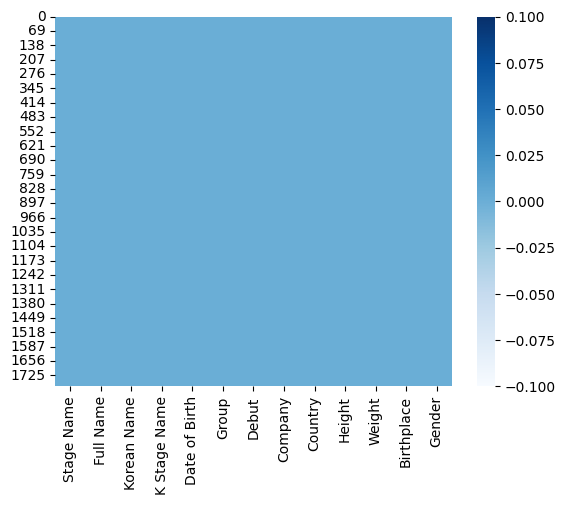

In [21]:
# Check for Missing values in the dataset
sns.heatmap(data=data.isna(), cmap='Blues')
plt.show()

So now not a single value is missing in the dataset

In [22]:
# Replace a single value with another value in Debut
data['Debut'] = data['Debut'].replace('0/01/1900', '01/01/1900')

In [23]:
data['Debut'] = pd.to_datetime(data['Debut'])

/tmp/ipykernel_20/3959840270.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Debut'] = pd.to_datetime(data['Debut'])


In [24]:
# split Debut Date to year
data['Debut Year'] = data['Debut'].dt.year
data.head()

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender,Debut Year
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,2014-08-26,Jungle,South Korea,172.0,55.0,Seoul,M,2014
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,2019-09-07,ONO,South Korea,181.0,62.0,Seoul,M,2019
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,2015-10-31,A team,South Korea,177.0,63.0,Seoul,M,2015
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,2017-11-10,LUK,South Korea,163.0,57.0,Daegu,F,2017
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,2016-09-11,Double Kick,South Korea,160.0,44.0,Wonju,F,2016


In [25]:
data['Debut Year'] = data['Debut Year'].astype(str)

## **Check if any Duplicate Value**

In [26]:
# Lets Check for duplicates values in the dataset
data.duplicated().any()

False

# **Exploratory Data Analysis**

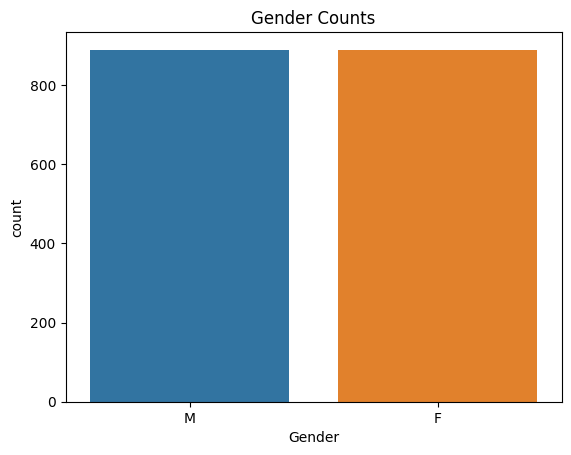

In [27]:
# Number of Males and Females Singer
sns.countplot(data=data, x='Gender')
plt.title('Gender Counts')
plt.show()

### **Which Group have more Number of Singers**

In [28]:
# Group having more number of singers
group_members = data.groupby(['Group']).count()['Stage Name'].reset_index(name='Count')
group_members.sort_values(by='Count', ascending= False, inplace=True)
group_members = group_members.head(5)
group_members.head()

,Group,Count
178,NCT,166
2,14U,14
222,Seventeen,13
284,tripleS,12
154,LOONA,12


In [29]:
# Plot Group having more singers
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=group_members['Group'], y=group_members['Count'], text=group_members['Count'], textposition='inside')])
fig.update_layout(title='Top Five Groups having More singers', xaxis_title='Group', yaxis_title='Counts')
fig.update_traces(marker_color='rgb(153, 51, 102)', marker_line_color='rgb(26, 0, 13)',
                  marker_line_width=1.5)
fig.show()

### **Which Country Have More Singers**

In [30]:
# top country having more singers
country_count = data.groupby(['Country']).count()['Stage Name'].reset_index(name='Count')
country_count.sort_values(by='Count', ascending=False, inplace=True)
country_count = country_count.head(5)
country_count.head()

,Country,Count
15,South Korea,1599
9,Japan,64
4,China,46
18,USA,18
17,Thailand,13


In [31]:
# top five country with more number of singers
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=country_count['Country'], values=country_count['Count'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='Top five Countries with more Singers')
fig.show()

### **List Top Five Company of Singers with number of Singers in Each Comapny in South Korea**

In [32]:
# Numbber of Singers in each Company in South Korea
data_sk = data[data['Country'] == 'South Korea']
singers_sk = data_sk.groupby(['Company']).count()['Stage Name'].reset_index(name='Count')
singers_sk.sort_values(by='Count', ascending=False, inplace=True)
singers_sk = singers_sk.head()
singers_sk.head()

,Company,Count
142,SM,171
55,FNC,47
84,JYP,44
153,Starship,42
167,Woollim,35


In [33]:
# Plot Companies having more singers in South Korea
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=singers_sk['Company'], y=singers_sk['Count'], text=singers_sk['Count'], textposition='inside')])
fig.update_layout(title='Top Five Comapnies in South Korea having more Singers', xaxis_title='Company', yaxis_title='Counts')
fig.show()

### **What are Top five Cities with more birthplaces of Singers in South Korea**

In [34]:
# Top 5 cities Birthplace of Singers in South Korea
birthplace_group = data_sk.groupby(['Birthplace']).count()['Stage Name'].reset_index(name='Count')
birthplace_group.sort_values(by='Count', ascending=False, inplace=True)
birthplace_group = birthplace_group.head(5)
birthplace_group.head()

,Birthplace,Count
80,Seoul,1077
7,Busan,68
49,Incheon,44
37,Gwangju,40
17,Daegu,34


In [35]:
# Plot Top 5 Birthplace with more Singers in South Korea
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=birthplace_group['Birthplace'], y=birthplace_group['Count'], text=singers_sk['Count'], textposition='inside')])
fig.update_layout(title='Top 5 Birthplaces having more Number of Singers in South Korea', xaxis_title='Company', yaxis_title='Counts')
fig.show()

### **List Average Height of Singers in South Korea**

In [36]:
# Average Height of a Singer in South Korea
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk['Height'].mean().round(2),
    title = {"text": "Average Height of a Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **List Average Weight of Singers in South Korea**

In [37]:
# Average Weight of a Singer in South Korea
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk['Weight'].mean().round(2),
    title = {"text": "Average Weight of a Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **List Average Height of Female Singers in South Korea**

In [38]:
# Average Height of a Female Singer in South Korea

import plotly.graph_objects as go

data_sk_female = data_sk[data_sk['Gender'] == 'F']

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk_female['Height'].mean().round(2),
    title = {"text": "Average Height of Female Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **List Average Weight of Female Singers in South Korea**

In [39]:
# Average Weight of Female Singer in South Korea
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk_female['Weight'].mean().round(2),
    title = {"text": "Average Weight of Female Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **List Average Height of Male Singers in South Korea**

In [40]:
# Average Height of a Male Singer in South Korea

import plotly.graph_objects as go

data_sk_male = data_sk[data_sk['Gender'] == 'M']

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk_male['Height'].mean().round(2),
    title = {"text": "Average Height of Male Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **List Average Weight of Male Singers in South Korea**

In [41]:
# Average Weight of a Male Singer in South Korea

import plotly.graph_objects as go

data_sk_male = data_sk[data_sk['Gender'] == 'M']

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_sk_male['Weight'].mean().round(2),
    title = {"text": "Average Weight of Male Singer in South Korea<br><span style='font-size:0.8em;color:gray'>"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

### **Which Years Have the Highest Number of Debut Singers in South Korea**

In [42]:
# Debut Year with highest singers in South Korea
debut_year_singers  = data_sk.groupby(['Debut Year']).count()['Stage Name'].reset_index(name='Count')
debut_year_singers.sort_values(by='Count', ascending= False, inplace=True)
debut_year_singers = debut_year_singers.head(10)
debut_year_singers.head()

,Debut Year,Count
16,2016,229
20,2020,177
22,2022,157
19,2019,150
17,2017,139


In [43]:
# Top 10 Years with the Highest Number of Debut Singers in South Korea
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=debut_year_singers['Debut Year'], y=debut_year_singers['Count'], text=debut_year_singers['Count'], textposition='inside')])
fig.update_layout(title='Top 10 Years with the Highest Number of Debut Singers in South Korea', xaxis_title='Year', yaxis_title='Counts')
fig.show()

# **Singers Group Classification and Prediction using Multi-Layer Perceptron (MLP) Classifier**

In [44]:
data.head()

,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Height,Weight,Birthplace,Gender,Debut Year
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,2014-08-26,Jungle,South Korea,172.0,55.0,Seoul,M,2014
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,2019-09-07,ONO,South Korea,181.0,62.0,Seoul,M,2019
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,2015-10-31,A team,South Korea,177.0,63.0,Seoul,M,2015
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,2017-11-10,LUK,South Korea,163.0,57.0,Daegu,F,2017
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,2016-09-11,Double Kick,South Korea,160.0,44.0,Wonju,F,2016


In [45]:
# Selecting Features for Group Classification
groupClass = data[['Debut Year', 'Company', 'Height', 'Weight', 'Group']].copy()
groupClass.head()

,Debut Year,Company,Height,Weight,Group
0,2014,Jungle,172.0,55.0,7 O'clock
1,2019,ONO,181.0,62.0,Limitless
2,2015,A team,177.0,63.0,VAV
3,2017,LUK,163.0,57.0,Hash Tag
4,2016,Double Kick,160.0,44.0,MOMOLAND


### Label Encoding

In [46]:
# we need to label encode some of column.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Debut Year' column
groupClass['Debut Year'] = label_encoder.fit_transform(groupClass['Debut Year'])

# Print the encoded column
# print(df['Debut Year'])

# Encode the 'Company' column
groupClass['Company'] = label_encoder.fit_transform(groupClass['Company'])

# Encode the 'Group' column
groupClass['Group'] = label_encoder.fit_transform(groupClass['Group'])

#print dataframe
groupClass.head()

,Debut Year,Company,Height,Weight,Group
0,14,88,172.0,55.0,13
1,19,126,181.0,62.0,158
2,15,1,177.0,63.0,256
3,17,99,163.0,57.0,119
4,16,47,160.0,44.0,167


In [47]:
# now we need to split target variable
X = groupClass[['Debut Year', 'Company', 'Height', 'Weight']]
y = groupClass['Group']

In [48]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1422, 4) (1422,)
Testing set shape: (356, 4) (356,)


In [49]:
# Feature Normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

### Model

In [50]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLP Classifier with more hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))

# Fit the classifier to the training data
mlp.fit(X_train, y_train)

# Predict on the testing data
y_pred = mlp.predict(X_test)

# Evaluate the model performance
accuracy = mlp.score(X_test, y_test.ravel())
print("Accuracy:", accuracy)

Accuracy: 0.6095505617977528


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



### Hyperparameter Tunning

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create an instance of the MLP Classifier
mlp = MLPClassifier(max_iter=1500)

# Define the hyperparameters and their possible values
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.6797752808988764


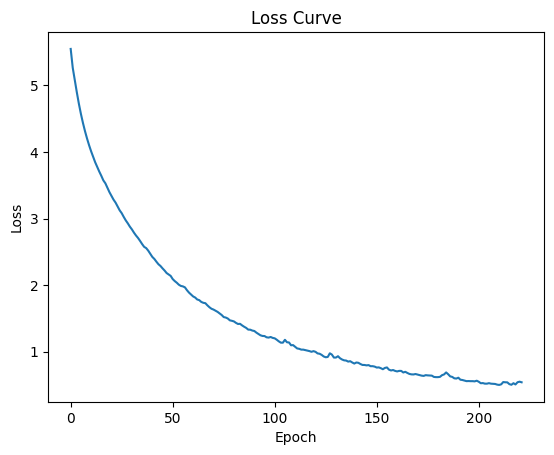

F1 Score: 0.6689749486915343


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


# Create an instance of the MLP Classifier with more hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100),max_iter=1500, activation='tanh', alpha=0.0001)

# Fit the classifier to the training data
mlp.fit(X_train, y_train)

# Get the loss curve
loss_curve = mlp.loss_curve_

# Plot the loss curve
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


# Predict on the testing data
y_pred = mlp.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)